In [1]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import hilbert
import matplotlib.pyplot as plt
from python_speech_features import mfcc

In [2]:
data_type = 'raw_env_check'
time_len = 20    ##ms

In [3]:
def extract_env(wav):
    hilb_wav = hilbert(wav)
    amp_envelope = np.abs(hilb_wav)
    hilb_phase = np.unwrap(np.angle(hilb_wav))
    temp_fine = np.cos(hilb_phase)
    return amp_envelope, temp_fine

In [4]:
np.random.seed(37)

people_arr = np.arange(65)+1
np.random.shuffle(people_arr)
print(people_arr)

##[30 19 53 40 28 10 34  1  6  7 14 51 52 46 17 37  5 65 12 33 64 21 50 39
##  2 59 38 55 15  8 31 42 49 26 35 61  3 58 11 56 20 45 47 18 27 48 62 63
## 57 41  9 32 24 25 22 43  4 36 23 54 29 60 13 44 16]

label_set = [[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]

[30 19 53 40 28 10 34  1  6  7 14 51 52 46 17 37  5 65 12 33 64 21 50 39
  2 59 38 55 15  8 31 42 49 26 35 61  3 58 11 56 20 45 47 18 27 48 62 63
 57 41  9 32 24 25 22 43  4 36 23 54 29 60 13 44 16]


In [5]:
if data_type=='raw':
    point_len = int(time_len*10)
        
    for k1 in range(50):
        for k2 in range(5):
            file_name = 'data/wav_10k/OS1_%d_%d.wav'%(people_arr[k1], k2+1)
            sr, wav = wavfile.read(file_name)
            wav = (2./65535.) * (wav.astype(np.float32) - 32767) + 1.
            wav = wav[:4000].reshape(-1, point_len)
            dlabel = np.array([label_set[k2]]*len(wav))
            
            if k1==0 and k2==0:
                trainX = wav
                trainY = dlabel
            else:
                trainX = np.concatenate((trainX, wav))
                trainY = np.concatenate((trainY, dlabel))
                
    for k1 in range(15):
        for k2 in range(5):
            file_name = 'data/wav_10k/OS1_%d_%d.wav'%(people_arr[50+k1], k2+1)
            sr, wav = wavfile.read(file_name)
            wav = (2./65535.) * (wav.astype(np.float32) - 32767) + 1.
            wav = wav[:4000].reshape(-1, point_len)
            dlabel = [label_set[k2]]*len(wav)
            
            if k1==0 and k2==0:
                testX = wav
                testY = dlabel
            else:
                testX = np.concatenate((testX, wav))
                testY = np.concatenate((testY, dlabel))
    
    np.save('npy_data/raw/raw_%.1fms_trainX.npy'%time_len, trainX)
    np.save('npy_data/raw/raw_%.1fms_trainY.npy'%time_len, trainY)
    np.save('npy_data/raw/raw_%.1fms_testX.npy'%time_len, testX)
    np.save('npy_data/raw/raw_%.1fms_testY.npy'%time_len, testY)
    
    print('raw data shape  -  %.1f ms'%time_len)
    print('train set :', np.shape(trainX) , np.shape(trainY))
    print('test set :', np.shape(testX) ,np.shape(testY))

In [6]:
if data_type=='raw_env':
    point_len = int(time_len*10)
        
    for k1 in range(50):
        for k2 in range(5):
            file_name = 'data/wav_10k/OS1_%d_%d.wav'%(people_arr[k1], k2+1)
            sr, wav = wavfile.read(file_name)
            wav = (2./65535.) * (wav.astype(np.float32) - 32767) + 1.
            wav = wav[:4000].reshape(-1, point_len)
            dlabel = np.array([label_set[k2]]*len(wav))
            
            if k1==0 and k2==0:
                trainX = wav
                trainY = dlabel
            else:
                trainX = np.concatenate((trainX, wav))
                trainY = np.concatenate((trainY, dlabel))
                
    for k1 in range(15):
        for k2 in range(5):
            file_name = 'data/wav_10k/OS1_%d_%d.wav'%(people_arr[50+k1], k2+1)
            sr, wav = wavfile.read(file_name)
            wav = (2./65535.) * (wav.astype(np.float32) - 32767) + 1.
            wav = wav[:4000].reshape(-1, point_len)
            dlabel = [label_set[k2]]*len(wav)
            
            if k1==0 and k2==0:
                testX = wav
                testY = dlabel
            else:
                testX = np.concatenate((testX, wav))
                testY = np.concatenate((testY, dlabel))
    
    trainX = np.abs(hilbert(trainX))
    testX = np.abs(hilbert(testX))

    np.save('npy_data/raw_env/raw_env_%.1fms_trainX.npy'%time_len, trainX)
    np.save('npy_data/raw_env/raw_env_%.1fms_trainY.npy'%time_len, trainY)
    np.save('npy_data/raw_env/raw_env_%.1fms_testX.npy'%time_len, testX)
    np.save('npy_data/raw_env/raw_env_%.1fms_testY.npy'%time_len, testY)
    
    print('raw data shape  -  %.1f ms'%time_len)
    print('train set :', np.shape(trainX) , np.shape(trainY))
    print('test set :', np.shape(testX) ,np.shape(testY))

In [6]:
if data_type=='raw_band_env':
    point_len = int(time_len*10)
        
    for k1 in range(50):
        for k2 in range(5):
            file_name = 'data/wav_10k/OS1_%d_%d.wav'%(people_arr[k1], k2+1)
            sr, wav = wavfile.read(file_name)
            wav = (2./65535.) * (wav.astype(np.float32) - 32767) + 1.
            wav = wav[:4000].reshape(-1, point_len)
            dlabel = np.array([label_set[k2]]*len(wav))
            
            if k1==0 and k2==0:
                trainX = wav
                trainY = dlabel
            else:
                trainX = np.concatenate((trainX, wav))
                trainY = np.concatenate((trainY, dlabel))
                
    for k1 in range(15):
        for k2 in range(5):
            file_name = 'data/wav_10k/OS1_%d_%d.wav'%(people_arr[50+k1], k2+1)
            sr, wav = wavfile.read(file_name)
            wav = (2./65535.) * (wav.astype(np.float32) - 32767) + 1.
            wav = wav[:4000].reshape(-1, point_len)
            dlabel = [label_set[k2]]*len(wav)
            
            if k1==0 and k2==0:
                testX = wav
                testY = dlabel
            else:
                testX = np.concatenate((testX, wav))
                testY = np.concatenate((testY, dlabel))
    
    fft_tr = np.fft.rfft(trainX)
    fft_te = np.fft.rfft(testX)
    env_set_tr = np.zeros((np.shape(fft_tr)[0], 10, np.shape(trainX)[-1]))
    env_set_te = np.zeros((np.shape(fft_te)[0], 10, np.shape(testX)[-1]))
    
    print(np.shape(fft_tr))
    n_band = 10
    for k in range(10):
        dfft_tr = fft_tr.copy()
        dfft_tr[:, :1+10*k] = 0
        dfft_tr[:, 1+10*(k+1):] = 0
        idfft_tr = np.fft.irfft(dfft_tr)
        denv_tr, dtfs_tr = extract_env(idfft_tr)
        if k<n_band:
            env_set_tr[:,k,:] = denv_tr 
        else:
            env_set_tr[:,k,:] = idfft_tr            
        
        dfft_te = fft_te.copy()
        dfft_te[:, :1+10*k] = 0
        dfft_te[:, 1+10*(k+1):] = 0
        idfft_te = np.fft.irfft(dfft_te)
        denv_te, dtfs_te = extract_env(idfft_te)
        if k<n_band:
            env_set_te[:,k,:] = denv_te 
        else:
            env_set_te[:,k,:] = idfft_te
        
        
    env_set_tr = np.sum(env_set_tr, axis=1)
    env_set_te = np.sum(env_set_te, axis=1)
    np.save('npy_data/raw_band_env/%draw_band_env_%.1fms_trainX.npy'%(n_band, time_len), env_set_tr)
    np.save('npy_data/raw_band_env/%draw_band_env_%.1fms_trainY.npy'%(n_band, time_len), trainY)
    np.save('npy_data/raw_band_env/%draw_band_env_%.1fms_testX.npy'%(n_band, time_len), env_set_te)
    np.save('npy_data/raw_band_env/%draw_band_env_%.1fms_testY.npy'%(n_band, time_len), testY)
    
    print('raw data shape  -  %.1f ms'%time_len)
    print('train set :', np.shape(env_set_tr) , np.shape(env_set_te))
    print('test set :', np.shape(testX) ,np.shape(testY))

(1500, 101)
(1500, 10, 200)


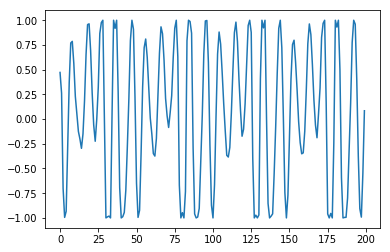

In [9]:
if data_type=='raw_env_check':
    point_len = int(time_len*10)

    for k1 in range(15):
        for k2 in range(5):
            file_name = 'data/wav_10k/OS1_%d_%d.wav'%(people_arr[50+k1], k2+1)
            sr, wav = wavfile.read(file_name)
            wav = (2./65535.) * (wav.astype(np.float32) - 32767) + 1.
            wav = wav[:4000].reshape(-1, point_len)
            dlabel = [label_set[k2]]*len(wav)
            
            if k1==0 and k2==0:
                testX = wav
                testY = dlabel
            else:
                testX = np.concatenate((testX, wav))
                testY = np.concatenate((testY, dlabel))
    
    fft_te = np.fft.rfft(testX)
    env_set_te = np.zeros((np.shape(fft_te)[0], 10, np.shape(testX)[-1]))
    print(np.shape(fft_te))
    print(np.shape(env_set_te))
    
    plt.plot(testX[0])
    plt.show()
#     print(np.shape(fft_te))
#     n_band = 10
#     for k in range(10):
#         dfft_te = fft_te.copy()
#         dfft_te[:, :1+10*k] = 0
#         dfft_te[:, 1+10*(k+1):] = 0
#         plt.plot(np.abs(dfft_te[0]))
#         plt.savefig('image_env_check/fft_%d.png'%(k+1))
#         plt.show()
#         idfft_te = np.fft.irfft(dfft_te)
#         plt.plot(idfft_te[0], label='raw')
#         denv_te, dtfs_te = extract_env(idfft_te)
#         plt.plot(denv_te[0],'r',label='env')
#         plt.legend()
#         plt.savefig('image_env_check/env_%d.png'%(k+1))
#         plt.show()
#         if k<n_band:
#             env_set_te[:,k,:] = denv_te 
#         else:
#             env_set_te[:,k,:] = idfft_te
        
        

#     env_set_te = np.sum(env_set_te, axis=1)


In [8]:
if data_type=='mem':
    point_len = int(time_len*10)
        
    for k1 in range(50):
        for k2 in range(5):
            file_name = 'data/mem_20181226_2/aei%d_%d.dat'%(people_arr[k1], k2+1)
            f = open(file_name)
            
            data = []
            for k3 in f.readlines():
                dline = k3.rstrip().split(",")
                data.append([float(d) for d in dline])
            
            data = np.array(data)[:,:4000].reshape(10, -1, point_len).transpose(1,0,2)
            dlabel = np.array([label_set[k2]]*len(data))
            
            if k1==0 and k2==0:
                trainX = data
                trainY = dlabel
            else:
                trainX = np.concatenate((trainX, data))
                trainY = np.concatenate((trainY, dlabel))
                
    for k1 in range(15):
        for k2 in range(5):
            file_name = 'data/mem_20181226_2/aei%d_%d.dat'%(people_arr[50+k1], k2+1)
            f = open(file_name)
            
            data = []
            for k3 in f.readlines():
                dline = k3.rstrip().split(",")
                data.append([float(d) for d in dline])
            
            data = np.array(data)[:,:4000].reshape(10, -1, point_len).transpose(1,0,2)
            dlabel = np.array([label_set[k2]]*len(data))
            
            if k1==0 and k2==0:
                testX = data
                testY = dlabel
            else:
                testX = np.concatenate((testX, data))
                testY = np.concatenate((testY, dlabel))
    
    np.save('npy_data/mem/mem_%.1fms_trainX.npy'%time_len, trainX)
    np.save('npy_data/mem/mem_%.1fms_trainY.npy'%time_len, trainY)
    np.save('npy_data/mem/mem_%.1fms_testX.npy'%time_len, testX)
    np.save('npy_data/mem/mem_%.1fms_testY.npy'%time_len, testY)
    
    print('mem data shape  -  %.1f ms'%time_len)
    print('train set :', np.shape(trainX) , np.shape(trainY))
    print('test set :', np.shape(testX) ,np.shape(testY))

0
(20, 10, 200)


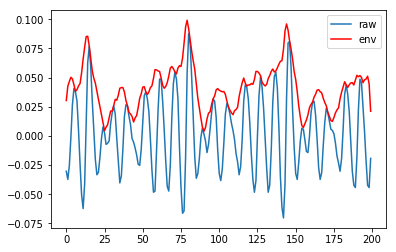

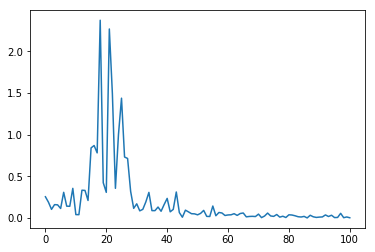

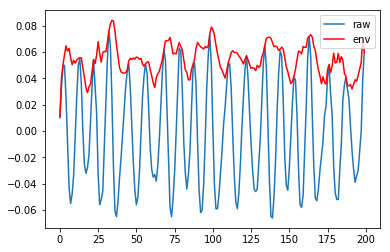

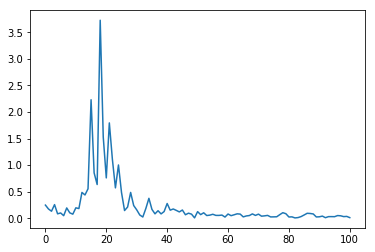

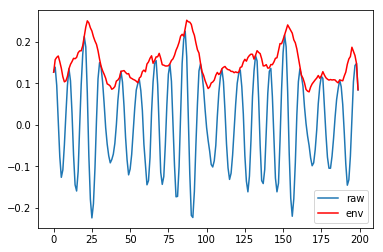

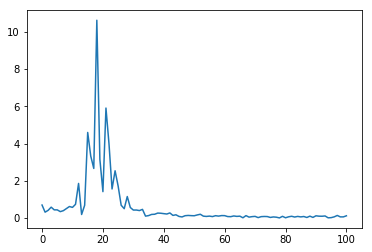

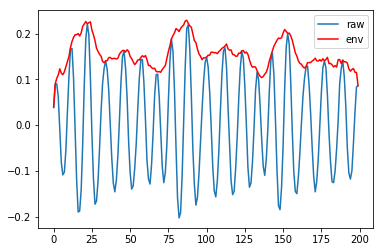

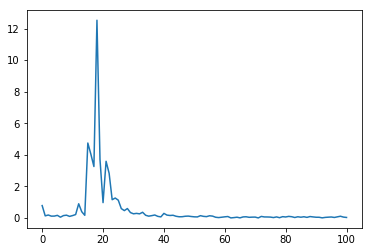

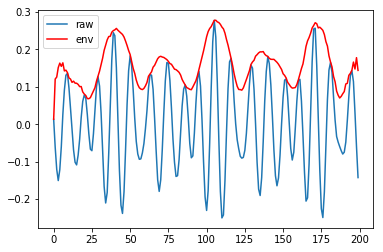

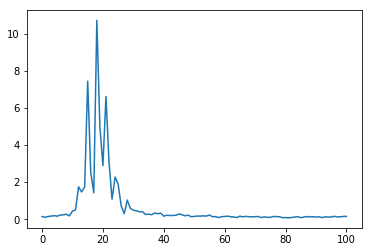

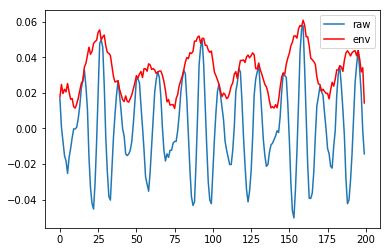

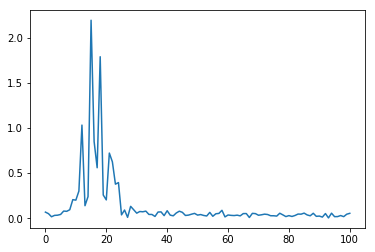

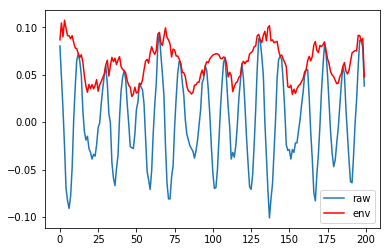

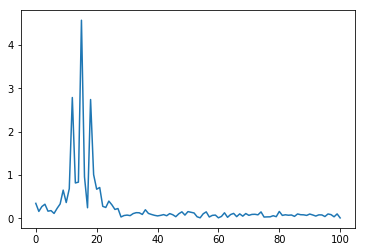

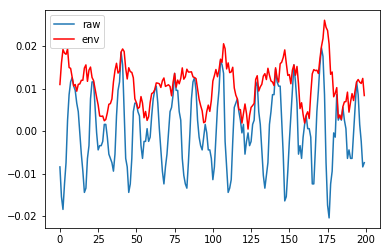

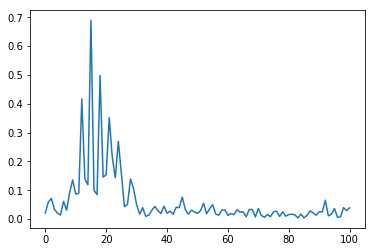

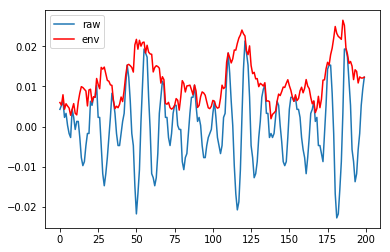

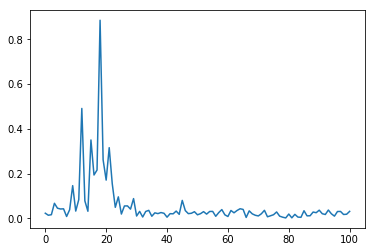

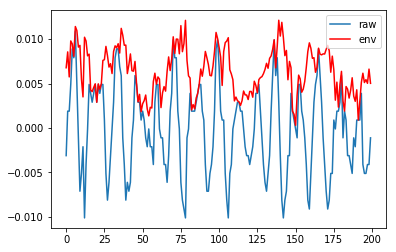

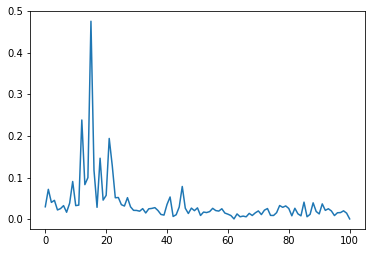

mem data shape  -  20.0 ms


NameError: name 'trainX' is not defined

In [8]:
if data_type=='mem_env_check':
    point_len = int(time_len*10)
        
    for k1 in range(1):
        for k2 in range(1):
            print(k2)
            file_name = 'data/mem_20181226_2/aei%d_%d.dat'%(people_arr[k1], k2+1)
            f = open(file_name)
            
            data = []
            for k3 in f.readlines():
                dline = k3.rstrip().split(",")
                data.append([float(d) for d in dline])
            
            data = np.array(data)[:,:4000].reshape(10, -1, point_len).transpose(1,0,2)
            dlabel = np.array([label_set[k2]]*len(data))
            env = np.abs(hilbert(data))
            print(np.shape(env))
            for k in range(10):
                plt.plot(data[0][k], label='raw')
                plt.plot(env[0][k],'r',label='env')
                plt.legend()
                plt.savefig('image_env_check_mem/env_%d.png'%(k+1))
                plt.show()
                
                plt.plot(np.abs(np.fft.rfft(data[0][k])))
                plt.savefig('image_env_check_mem/fft_%d.png'%(k+1))
                plt.show()
    
    print('mem data shape  -  %.1f ms'%time_len)
    print('train set :', np.shape(trainX) , np.shape(trainY))
    print('test set :', np.shape(testX) ,np.shape(testY))

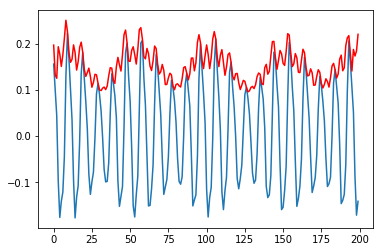

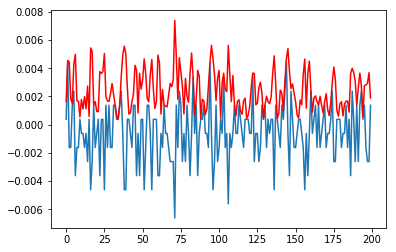

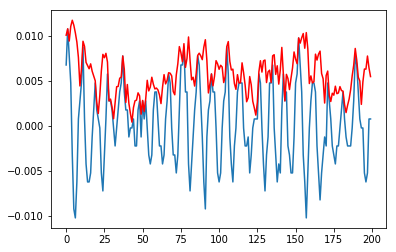

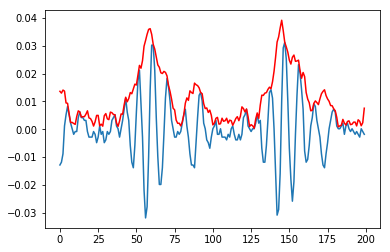

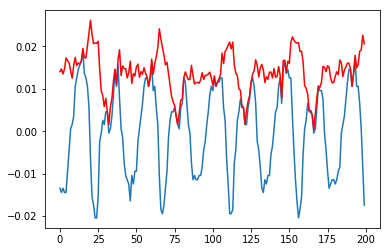

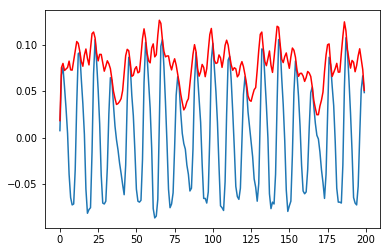

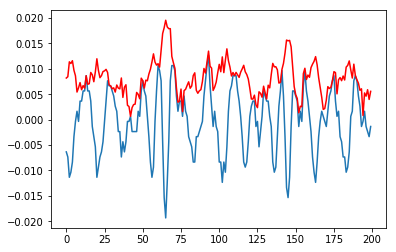

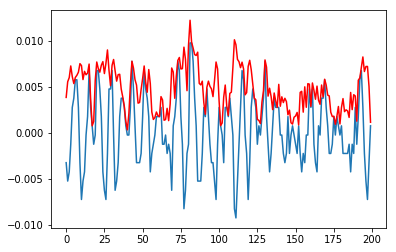

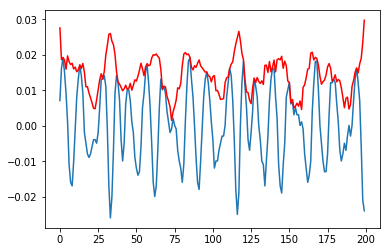

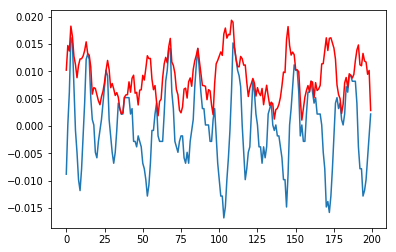

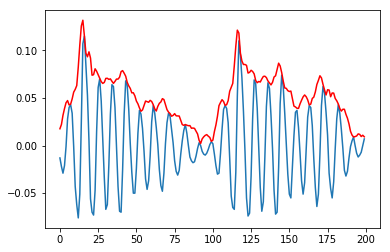

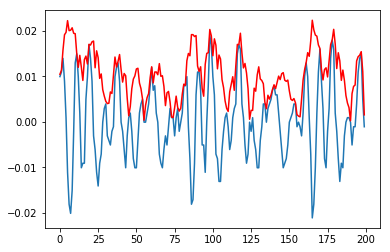

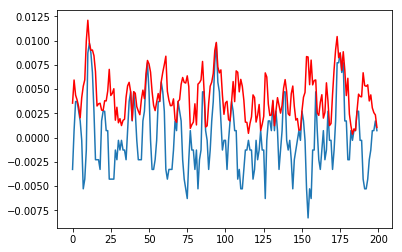

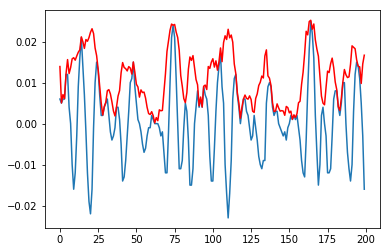

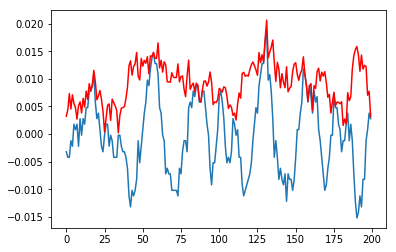

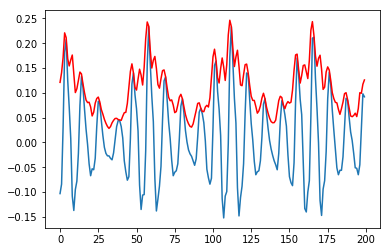

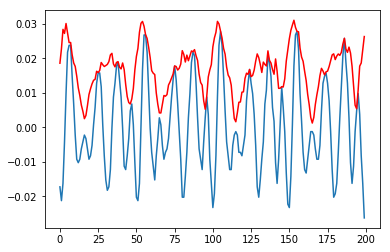

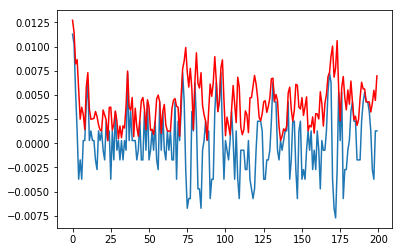

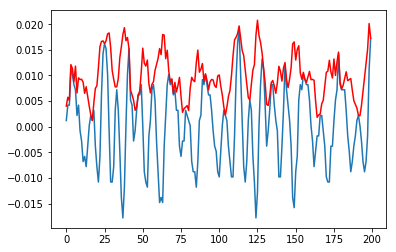

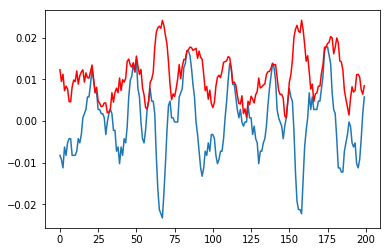

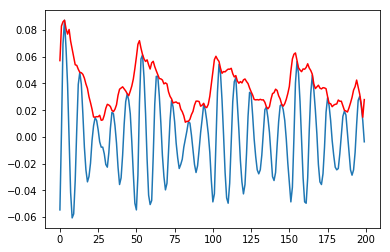

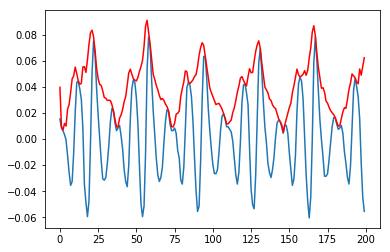

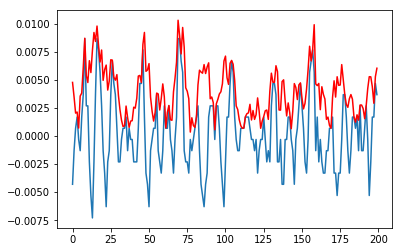

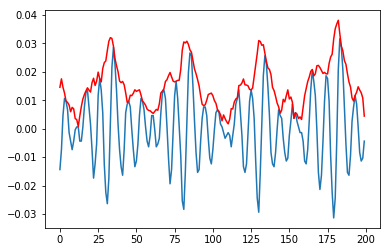

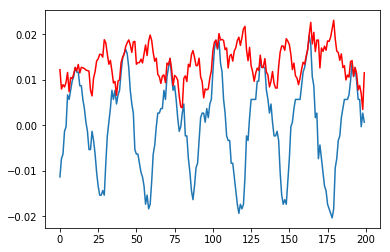

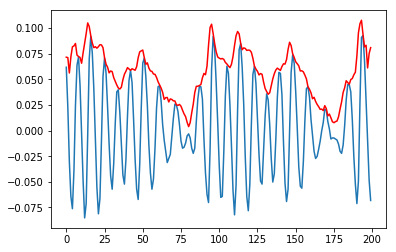

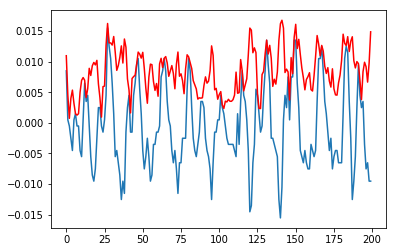

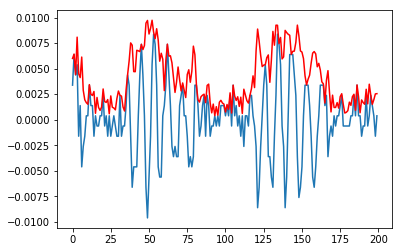

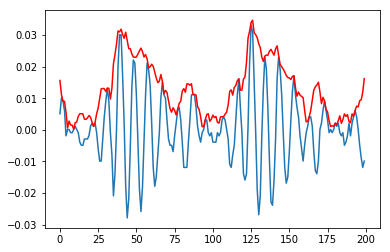

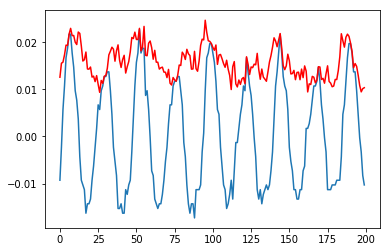

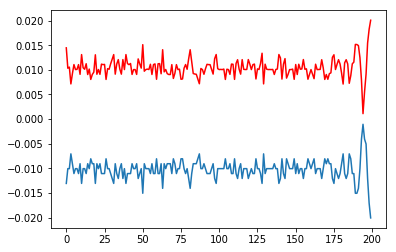

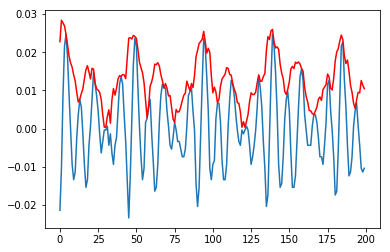

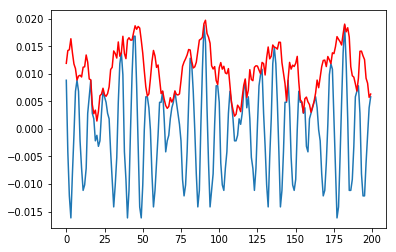

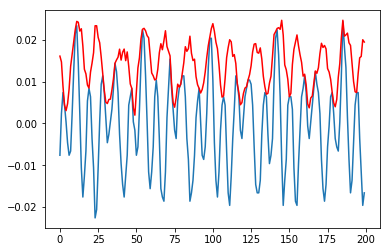

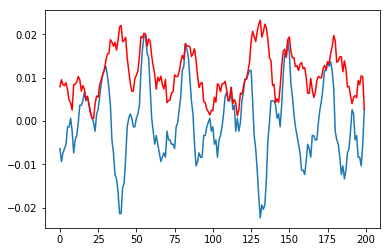

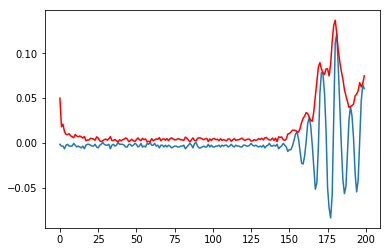

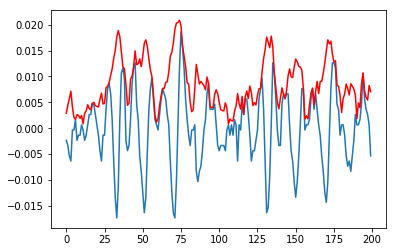

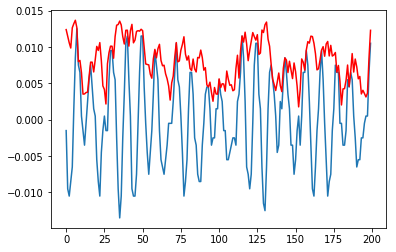

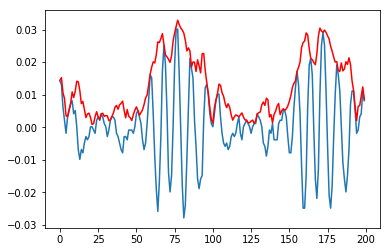

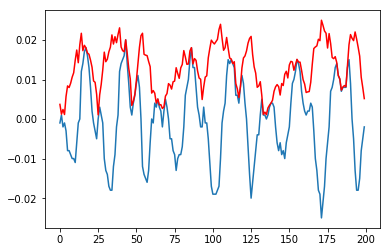

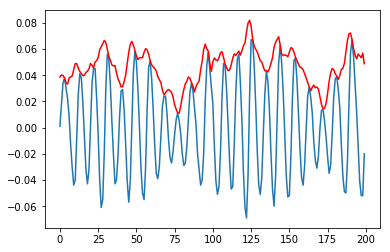

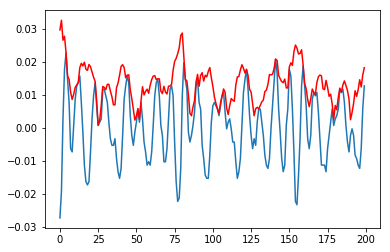

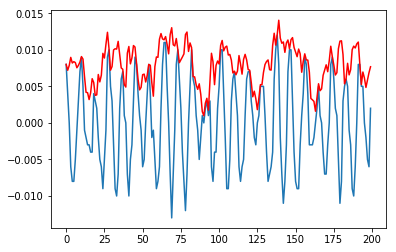

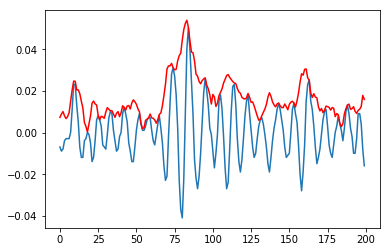

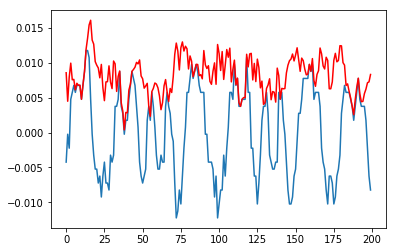

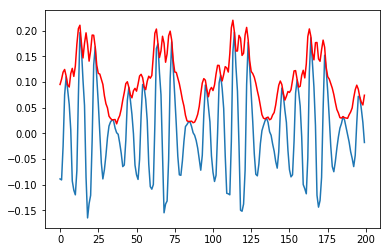

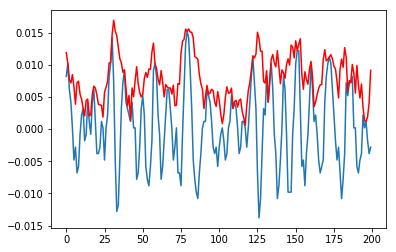

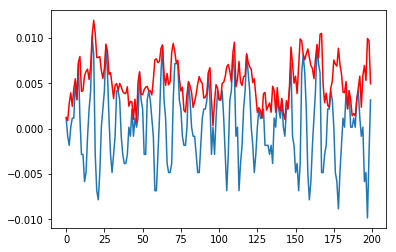

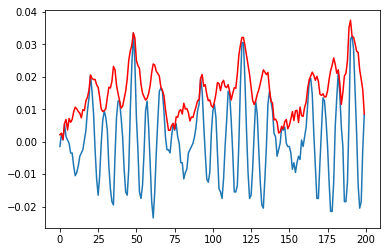

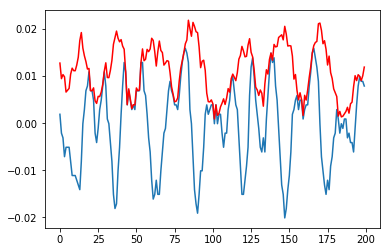

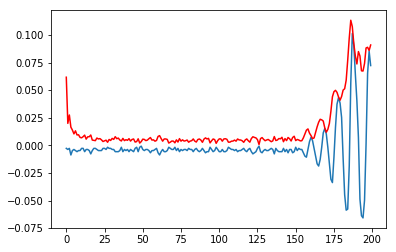

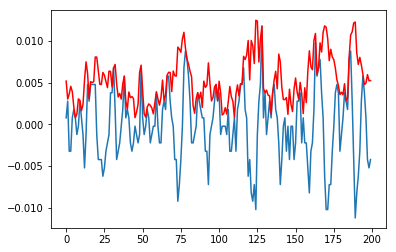

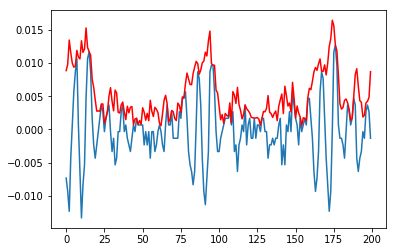

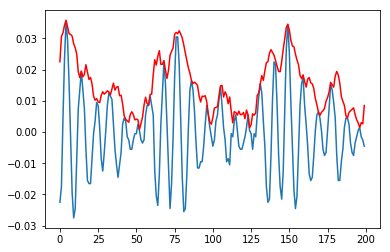

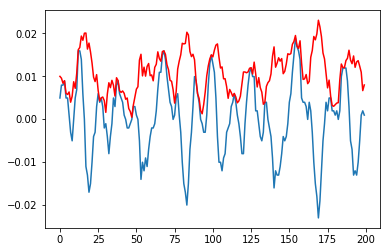

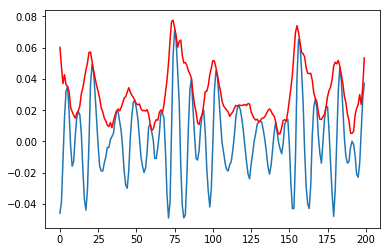

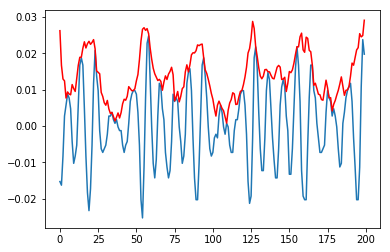

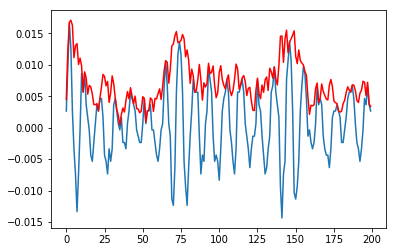

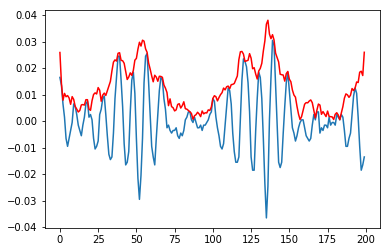

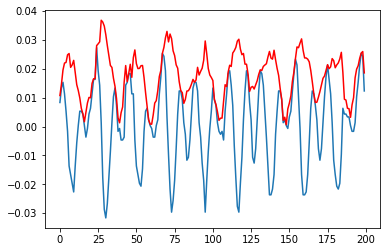

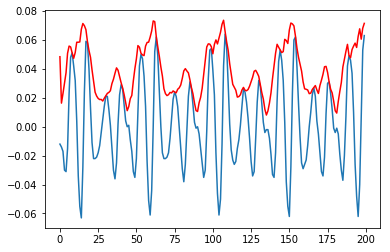

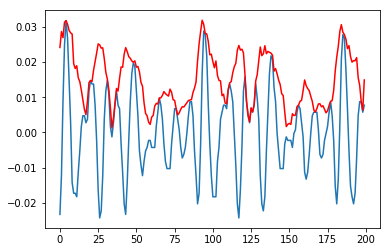

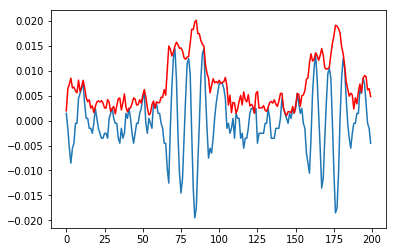

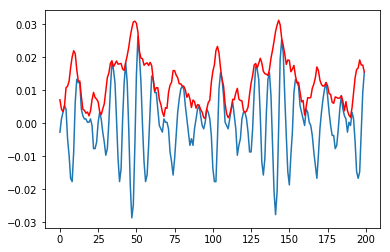

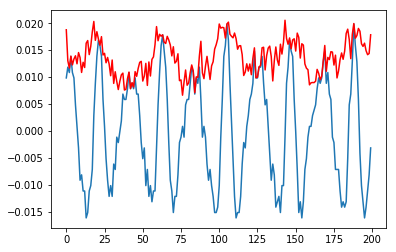

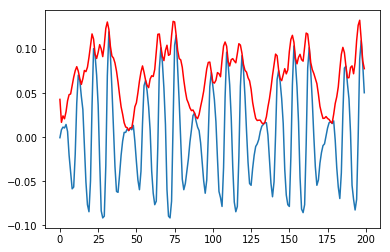

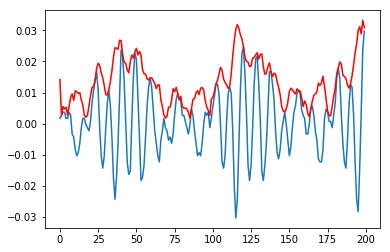

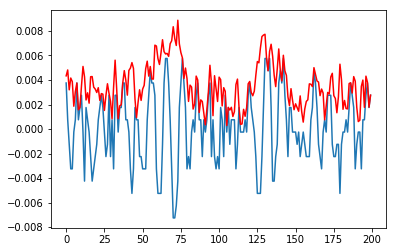

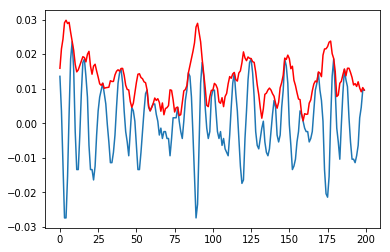

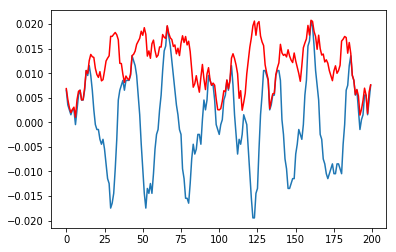

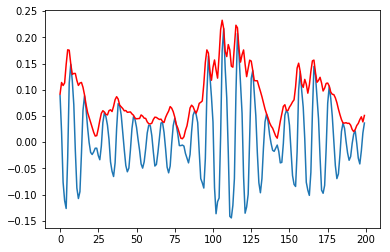

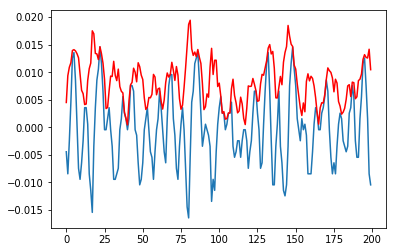

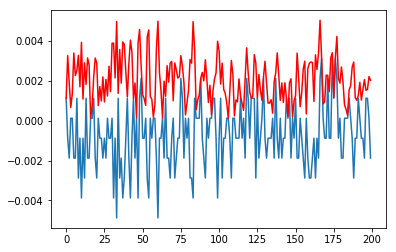

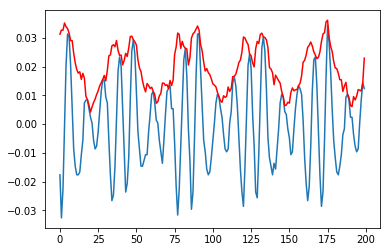

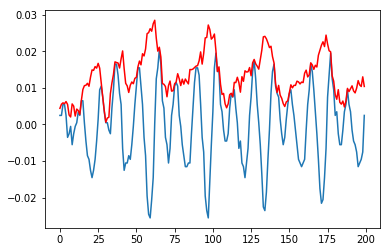

mem data shape  -  20.0 ms
train set : (5000, 10, 200) (5000, 5)
test set : (1500, 10, 200) (1500, 5)


In [5]:
if data_type=='mem_env':
    point_len = int(time_len*10)
        
    for k1 in range(50):
        for k2 in range(5):
            file_name = 'data/mem_20181226_2/aei%d_%d.dat'%(people_arr[k1], k2+1)
            f = open(file_name)
            
            data = []
            for k3 in f.readlines():
                dline = k3.rstrip().split(",")
                data.append([float(d) for d in dline])
            
            data = np.array(data)[:,:4000].reshape(10, -1, point_len).transpose(1,0,2)
            dlabel = np.array([label_set[k2]]*len(data))
            
            data = np.abs(hilbert(data))
            
            if k1==0 and k2==0:
                trainX = data
                trainY = dlabel
            else:
                trainX = np.concatenate((trainX, data))
                trainY = np.concatenate((trainY, dlabel))
                
    for k1 in range(15):
        for k2 in range(5):
            file_name = 'data/mem_20181226_2/aei%d_%d.dat'%(people_arr[50+k1], k2+1)
            f = open(file_name)
            
            data = []
            for k3 in f.readlines():
                dline = k3.rstrip().split(",")
                data.append([float(d) for d in dline])
            
            data = np.array(data)[:,:4000].reshape(10, -1, point_len).transpose(1,0,2)
            dlabel = np.array([label_set[k2]]*len(data))
            data = np.abs(hilbert(data))
            if k1==0 and k2==0:
                testX = data
                testY = dlabel
            else:
                testX = np.concatenate((testX, data))
                testY = np.concatenate((testY, dlabel))
    
    np.save('npy_data/mem_env/mem_env_%.1fms_trainX.npy'%time_len, trainX)
    np.save('npy_data/mem_env/mem_env_%.1fms_trainY.npy'%time_len, trainY)
    np.save('npy_data/mem_env/mem_env_%.1fms_testX.npy'%time_len, testX)
    np.save('npy_data/mem_env/mem_env_%.1fms_testY.npy'%time_len, testY)
    
    print('mem data shape  -  %.1f ms'%time_len)
    print('train set :', np.shape(trainX) , np.shape(trainY))
    print('test set :', np.shape(testX) ,np.shape(testY))